In [70]:
import pandas as pd
import numpy as np

In [71]:
df1= pd.read_csv(r"C:\Users\sathi\Downloads\deliveries.csv")

In [72]:
df2 = pd.read_csv(r"C:\Users\sathi\Downloads\matches.csv")

In [73]:
df2.rename(columns = {'id':'match_id'}, inplace = True)

In [76]:
df = pd.merge(df2,df1,on="match_id",how = "outer")

In [83]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",500)

### 2. The column which has the most missing values according to the data is:


In [82]:
df.isna().sum()

match_id                 0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
umpire2                500
umpire3             150712
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
f

In [88]:
df['city'].fillna(method="bfill",inplace=True)

In [90]:
df["winner"].fillna("draw",inplace=True)

In [91]:
df["player_of_match"].fillna("no result",inplace=True)

In [95]:
df["umpire1"].fillna(df["umpire1"].mode()[0],inplace=True)

In [96]:
df["umpire2"].fillna(df["umpire2"].mode()[0],inplace=True)

In [97]:
df.isna().sum()

match_id                 0
season                   0
city                     0
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                   0
win_by_runs              0
win_by_wickets           0
player_of_match          0
venue                    0
umpire1                  0
umpire2                  0
umpire3             150712
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
f

In [99]:
df.dropna(axis=1,inplace=True)

### 3.City which hosted most number of seasons according to the data is



In [104]:
df2["city"].value_counts().nlargest()


city
Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: count, dtype: int64

### 4.Which year has the most number of matches played?



In [105]:
df2["season"].value_counts()

season
2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: count, dtype: int64

### 5.Maximum wins by Mumbai Indians in 2011 are



In [107]:
season_2011 = df2[df2["season"]==2011]

(season_2011["winner"] == "Mumbai Indians").sum()

10

### 6.For 'toss_decision' feature what kind of plot is suitable?


<Axes: xlabel='toss_decision'>

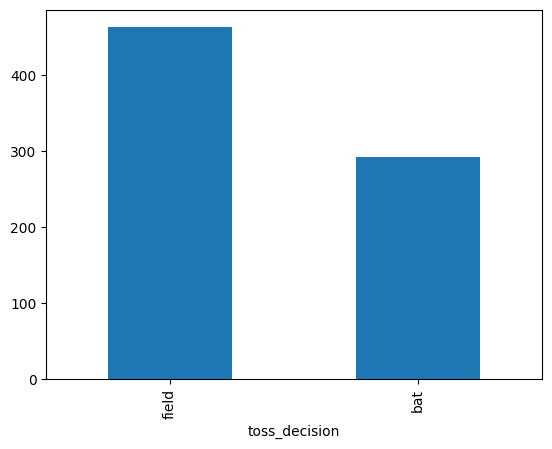

In [108]:

df2["toss_decision"].value_counts().plot.bar()

<Axes: ylabel='count'>

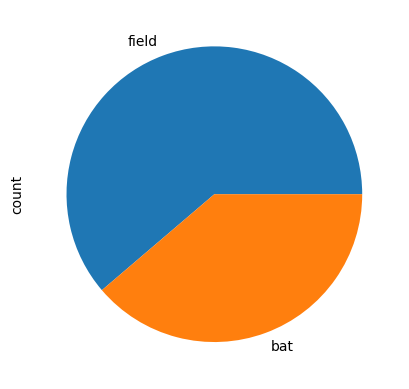

In [109]:
df2["toss_decision"].value_counts().plot.pie()

### 7.What is the percentage of getting bat and field in feature 'toss_descision'?



<Axes: ylabel='count'>

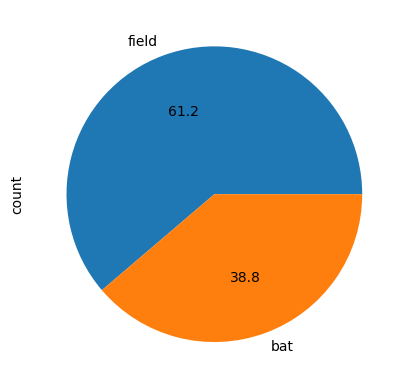

In [110]:
df2["toss_decision"].value_counts().plot.pie(autopct="%1.1f")

### 8.Which statement holds true


In [112]:
df2["toss_decision"].value_counts()

toss_decision
field    463
bat      293
Name: count, dtype: int64

In [115]:
df2.groupby(by=["toss_decision"])["winner"].count()

toss_decision
bat      292
field    460
Name: winner, dtype: int64

In [114]:
field = (len(df2[df2['toss_decision'] == 'field'])/len(df2))*100
bat = (len(df2[df2['toss_decision'] == 'bat'])/len(df2))*100

In [116]:
print(bat,field)

38.75661375661375 61.24338624338625


### 9.In which years where taking batting second have won more number of matches?


In [120]:
a = pd.crosstab(columns = df2['toss_decision'],index = df2['season'])

In [124]:
a

toss_decision,bat,field
season,,
2008,26,32
2009,35,22
2010,39,21
2011,25,48
2012,37,37
2013,45,31
2014,19,41
2015,25,34
2016,11,49


### 11. In 2019 which batsman scored highest number of runs by hitting 6's and 4's?



In [126]:
season_2019 = df[df['season']==2019]

a =season_2019[(season_2019['batsman_runs'] == 6 ) | (season_2019['batsman_runs'] == 4 )]

b = a.groupby(by="batsman")['total_runs'].sum()
print(b.max())
b[b == 442]

442


batsman
AD Russell    442
Name: total_runs, dtype: int64

### 12. Most number of wickets taken by a bowler is


In [131]:
a = df1[(df1['dismissal_kind'] == 'bowled') | (df1['dismissal_kind'] == 'caught')|(df1['dismissal_kind'] == 'lbw')|(df1['dismissal_kind'] == 'caught and bowled')|(df1['dismissal_kind'] == 'stumped')|(df1['dismissal_kind'] == 'hit wicket')]

a['bowler'].value_counts().nlargest(1)

bowler
SL Malinga    170
Name: count, dtype: int64

### 13.What is the strike rate of Kohli in 2016
HINT: strike rate = (Total Runs / Total Balls Faced) * 100



In [132]:

season_2016 = df[df['season']==2016]

virat = season_2016[season_2016['batsman']=='V Kohli']

runs = virat.iloc[:,31].sum()

print("Total runs : ",runs)

strike_rate = runs/len(virat)*100

strike_rate

Total runs :  973


148.54961832061068

### 14. Bowlers with maximum number of extras:


In [134]:
bowlers = df.groupby(by="bowler")['extra_runs'].sum()

bowlers.nlargest()

bowler
SL Malinga    293
P Kumar       236
UT Yadav      219
DJ Bravo      201
B Kumar       197
Name: extra_runs, dtype: int64

### 15. Which venue has hosted most number of IPL matches?


In [135]:
df.venue.value_counts()

venue
Eden Gardens                                            17991
Wankhede Stadium                                        17590
M Chinnaswamy Stadium                                   16872
Feroz Shah Kotla                                        15604
Rajiv Gandhi International Stadium, Uppal               13303
MA Chidambaram Stadium, Chepauk                         12006
Sawai Mansingh Stadium                                  11158
Punjab Cricket Association Stadium, Mohali               8266
Maharashtra Cricket Association Stadium                  5055
Subrata Roy Sahara Stadium                               4064
Dr DY Patil Sports Academy                               3993
Kingsmead                                                3643
Punjab Cricket Association IS Bindra Stadium, Mohali     3315
Sardar Patel Stadium, Motera                             2893
SuperSport Park                                          2866
Brabourne Stadium                                        2719
Dr

### 16. In 2017 when sunrisers hyderabad clashed against Royal Challengers Bangalore which team player won player of the match?



In [142]:
player = df[(df['season'] == 2017) &
  (df['batting_team'] == 'Sunrisers Hyderabad') &
  (df['bowling_team'] == 'Royal Challengers Bangalore')]

In [143]:
player['player_of_match'].unique()

array(['Yuvraj Singh'], dtype=object)

### 17. Across seasons who are the top three batsman's with most number of run out?



In [137]:
out = df1[df1['dismissal_kind'] == 'run out']

out['batsman'].value_counts().nlargest(3)

batsman
MS Dhoni      21
RG Sharma     17
KD Karthik    16
Name: count, dtype: int64

### 18. What are the total runs scored by V Kohli when the bowler was JJ Burmah?
rmah


In [145]:
virat_burmah = df[(df['batsman'] == 'V Kohli') & (df['bowler']=='JJ Bumrah')]
virat_burmah['batsman_runs'].sum()


112

### 19. Across all seasons which player was dismissed the maximum number of times via caught and bowled


In [147]:
df1[df1['dismissal_kind'] == 'caught and bowled']['player_dismissed'].value_counts().nlargest(3)

player_dismissed
SK Raina     7
RG Sharma    6
AT Rayudu    5
Name: count, dtype: int64

### 20. which player has the highest hard-hitting ability?



In [149]:

df[df['batsman_runs'] == 6]['batsman'].value_counts().nlargest(3)

batsman
CH Gayle          327
AB de Villiers    214
MS Dhoni          207
Name: count, dtype: int64